| | |
|:----------|:----------|
| Name      | Bayesian Modeling |
| Notebook  | Metropolis Sampler |
| Author    | Joshuah Touyz, PhD |
| Version   | 0.2 |
|Last update| 11/10/20 |

In [1]:
import numpy as np
import pandas as pd
import plotnine as pn
from scipy.stats import norm

In [5]:
# Metropolis Sampler for Poisson Gamma

# Utility functions
np.random.seed(123)
rnorm = lambda : np.random.normal(scale = 0.25, size = 1)
cdfnorm = lambda l,s: norm.cdf(0,loc = l, scale = s)
runif = lambda: np.random.uniform(size = 1)

# Constants
n = 5 ; n_iter = 5000
x = np.random.poisson(lam=10, size=n) # True value
alpha = 1; beta = 1
lambda_p = np.ones(n_iter)
alpha_prime = (sum(x) + alpha-1)
beta_prime =  (beta+n)

# Initial value
lambda_p[0] = np.mean(x)-5

for i in range(1,n_iter):
    # Constants
    lambda_proposed = lambda_p[i-1] + rnorm()

    # Scale correction factor
    required_boundary_correction = False

    # Boundary correction
    while(lambda_proposed<0):
        lambda_proposed = lambda_p[i-1] + rnorm()

    # Accept/reject criteria
    a = alpha_prime * (np.log(lambda_proposed) - np.log(lambda_p[i-1])) - \
        beta_prime * (lambda_proposed - lambda_p[i-1])
    
    boundary_correction = np.log((1-cdfnorm(lambda_p[i-1],1)) - np.log((1-cdfnorm(lambda_proposed,1))))

    log_u = np.log(runif())
    if (min(a,0)>log_u):
        # Accept sample
        lambda_p[i] = lambda_proposed
    else:
        # Reject sample
        lambda_p[i] = lambda_p[i-1]

lambda_p = pd.DataFrame(lambda_p).rename({0:'values'},axis=1)

In [6]:
d = np.random.gamma(shape = alpha_prime+1, scale = 1/beta_prime, size = n_iter)
d = pd.DataFrame({'values':d})

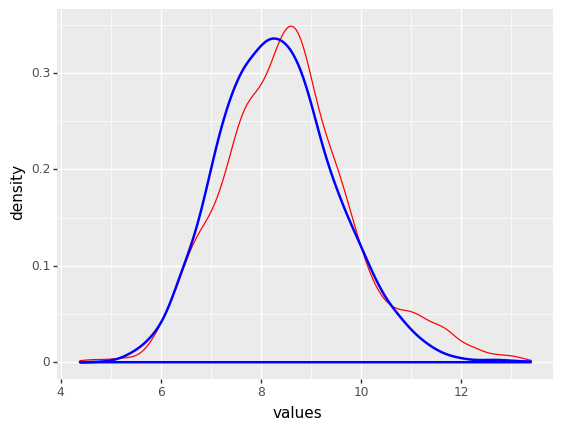

<ggplot: (331999671)>

In [7]:
pn.ggplot(pn.aes(x = 'values'), data = lambda_p) + pn.geom_density(color = 'red')\
    + pn.geom_density(pn.aes(x = 'values'), data = d, color = 'blue', size = 1,alpha= 0.4)